In [1]:
!pip install networkx matplotlib

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 14.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------- ----------------------- 5.2/12.6 MB 24.5 MB/s eta 0:00:01
   ---------------------------------- ----- 10.7/12.6 MB 25.4 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 24.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## DFS (깊이 우선 탐색)

In [1]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J'],
    'F': [],
    'G': [],
    'H': [],
    'I': [],
    'J': []
}

# 깊이 우선 탐색(DFS) 함수 정의
def dfs(node, visited=None, path_trace=None):
    # 방문한 노드를 기록하는 리스트, 최초 호출 시 초기화
    if visited is None:
        visited = []

    # 현재까지 탐색 경로를 저장하는 리스트, 재귀적으로 유지
    if path_trace is None:
        path_trace = []

    # 현재 노드를 방문 처리
    visited.append(node)

    # 경로 추적을 위해 현재 노드를 경로에 추가
    path_trace.append(node)

    # 현재까지의 탐색 경로 출력
    print("➡️ 경로:", " -> ".join(path_trace))

    # 현재 노드에 연결된 모든 이웃 노드를 탐색 (알파벳 순 정렬)
    for neighbor in sorted(graph[node]):
        if neighbor not in visited:  # 아직 방문하지 않은 경우에만
            dfs(neighbor, visited, path_trace)  # 재귀적으로 탐색

    # 해당 노드에서의 탐색이 끝나면 경로에서 제거 (되돌아가기)
    path_trace.pop()

# 실행 시작
print("🔍 DFS 탐색 시작 (알파벳 우선순위 기준)")
dfs('A')


🔍 DFS 탐색 시작 (알파벳 우선순위 기준)
➡️ 경로: A
➡️ 경로: A -> B
➡️ 경로: A -> B -> D
➡️ 경로: A -> B -> D -> H
➡️ 경로: A -> B -> D -> I
➡️ 경로: A -> B -> E
➡️ 경로: A -> B -> E -> J
➡️ 경로: A -> C
➡️ 경로: A -> C -> F
➡️ 경로: A -> C -> G


## BFS (너비 우선 탐색)

In [2]:
from collections import deque

# 너비 우선 탐색 함수
def bfs(start):
    visited = []               # 방문한 노드 기록
    queue = deque([start])     # 큐에 시작 노드 삽입

    while queue:
        node = queue.popleft()  # 큐에서 가장 먼저 들어온 노드를 꺼냄
        if node not in visited:
            print(f"👣방문: {node}")
            visited.append(node)

            # 알파벳 순으로 인접 노드를 큐에 추가
            queue.extend(sorted(graph[node]))
            print("📂 큐 내용 (리스트 형태):", list(queue))

    return visited

# 실행
print("\n🔍 BFS 탐색 결과 (알파벳 우선순위 기준):")
result = bfs('A')
print("📌 순서:", result)



🔍 BFS 탐색 결과 (알파벳 우선순위 기준):
👣방문: A
📂 큐 내용 (리스트 형태): ['B', 'C']
👣방문: B
📂 큐 내용 (리스트 형태): ['C', 'D', 'E']
👣방문: C
📂 큐 내용 (리스트 형태): ['D', 'E', 'F', 'G']
👣방문: D
📂 큐 내용 (리스트 형태): ['E', 'F', 'G', 'H', 'I']
👣방문: E
📂 큐 내용 (리스트 형태): ['F', 'G', 'H', 'I', 'J']
👣방문: F
📂 큐 내용 (리스트 형태): ['G', 'H', 'I', 'J']
👣방문: G
📂 큐 내용 (리스트 형태): ['H', 'I', 'J']
👣방문: H
📂 큐 내용 (리스트 형태): ['I', 'J']
👣방문: I
📂 큐 내용 (리스트 형태): ['J']
👣방문: J
📂 큐 내용 (리스트 형태): []
📌 순서: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


## 모든 신장 트리 찾기 (사이클 없는 연결 그래프)

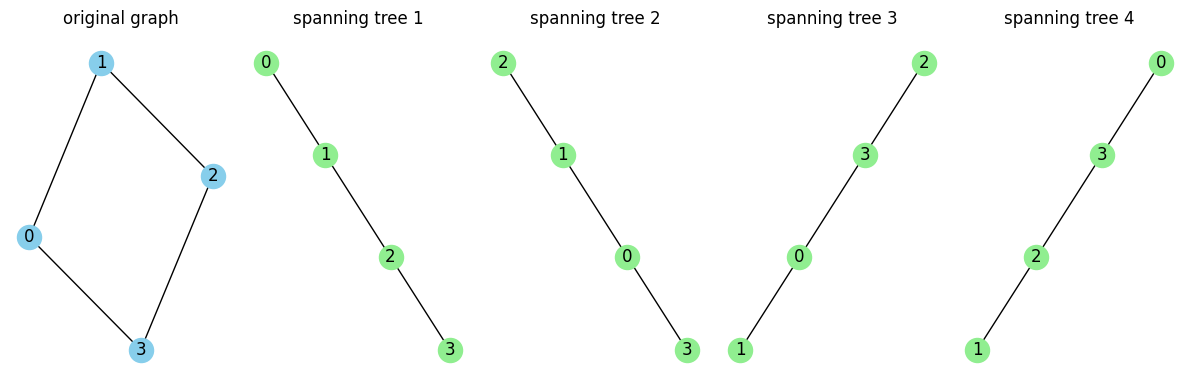

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# 1. 전체 그래프 정의 (사이클 포함)
nodes = [0, 1, 2, 3]
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]  # 4개의 간선 (사이클 존재)

# 2. 신장 트리 후보 찾기: 4개 중 3개씩 조합
candidate_trees = list(combinations(edges, 3))  # 4개 중 3개 선택

# 3. 신장 트리 판별 (사이클 없이 모든 노드 연결된 경우)
spanning_trees = []
for edge_set in candidate_trees:
    G = nx.Graph()
    G.add_nodes_from(nodes)         # 모든 노드 포함 (필수)
    G.add_edges_from(edge_set)      # 후보 간선 추가
    if nx.is_tree(G):               # 트리 조건: 연결 + 사이클 없음
        spanning_trees.append(G)

# 4. 시각화
fig, axes = plt.subplots(1, len(spanning_trees) + 1, figsize=(12, 4))

# 5. 원래 그래프
G_full = nx.Graph()
G_full.add_edges_from(edges)
nx.draw(G_full, with_labels=True, node_color='skyblue', ax=axes[0])
axes[0].set_title("original graph")

# 각 신장 트리 시각화
for i, tree in enumerate(spanning_trees):
    nx.draw(tree, with_labels=True, node_color='lightgreen', ax=axes[i + 1])
    axes[i + 1].set_title(f"spanning tree {i+1}")

plt.tight_layout()
plt.show()


## BFS 기반 신장 트리 + DFS 기반 신장 트리 비교

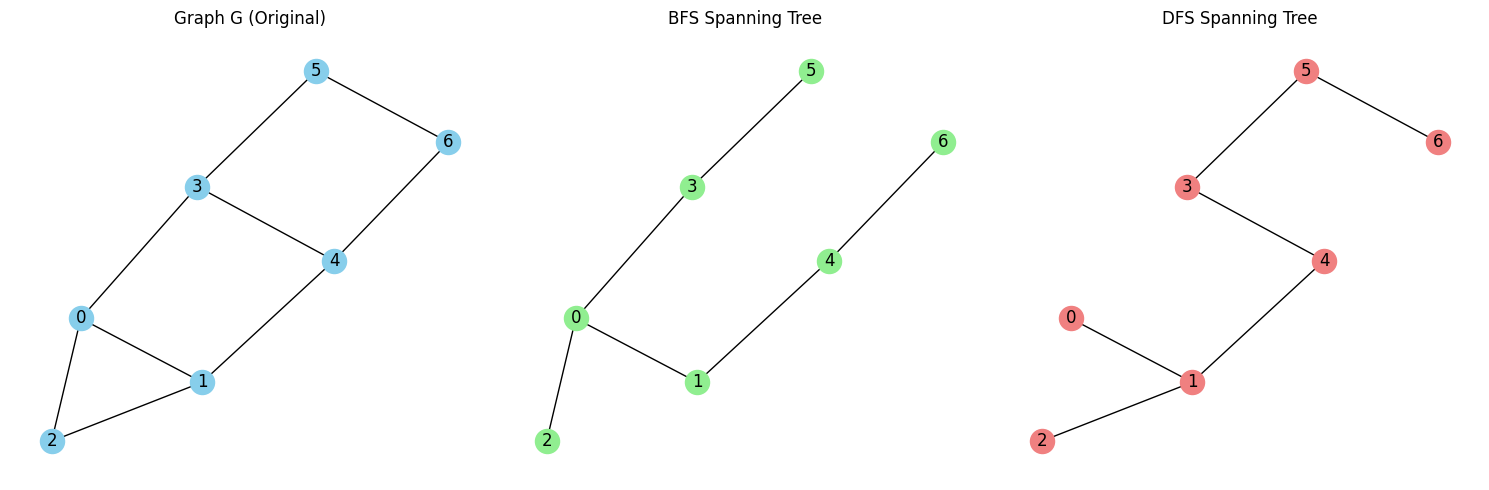

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# 1. 그래프 정의
G = nx.Graph()
edges = [
    (0,1), (0,2), (1,2), (1,4),
    (0,3), (3,4), (3,5), (5,6), (4,6)
]
G.add_edges_from(edges)

# 2. BFS 기반 신장 트리
def bfs_spanning_tree(graph, start):
    visited = set()
    tree = nx.Graph()
    queue = deque([start])
    visited.add(start)

    while queue:
        node = queue.popleft()
        for neighbor in sorted(graph.neighbors(node)):
            if neighbor not in visited:
                tree.add_edge(node, neighbor)
                visited.add(neighbor)
                queue.append(neighbor)
    return tree

# 3. DFS 기반 신장 트리
def dfs_spanning_tree(graph, start, visited=None, tree=None):
    if visited is None:
        visited = set()
    if tree is None:
        tree = nx.Graph()

    visited.add(start)
    for neighbor in sorted(graph.neighbors(start)):
        if neighbor not in visited:
            tree.add_edge(start, neighbor)
            dfs_spanning_tree(graph, neighbor, visited, tree)
    return tree

# 4. 각 탐색 방식으로 신장 트리 생성
bfs_tree = bfs_spanning_tree(G, 0)
dfs_tree = dfs_spanning_tree(G, 0)

# 5. 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pos = nx.spring_layout(G, seed=42)  # 노드 위치 고정

# (1) 원본
nx.draw(G, pos, with_labels=True, node_color='skyblue', ax=axes[0])
axes[0].set_title("Graph G (Original)")

# (2) BFS 트리
nx.draw(bfs_tree, pos, with_labels=True, node_color='lightgreen', ax=axes[1])
axes[1].set_title("BFS Spanning Tree")

# (3) DFS 트리
nx.draw(dfs_tree, pos, with_labels=True, node_color='lightcoral', ax=axes[2])
axes[2].set_title("DFS Spanning Tree")

plt.tight_layout()
plt.show()


## Kruskal 알고리즘을 통한 MST (최소 비용 신장 트리)

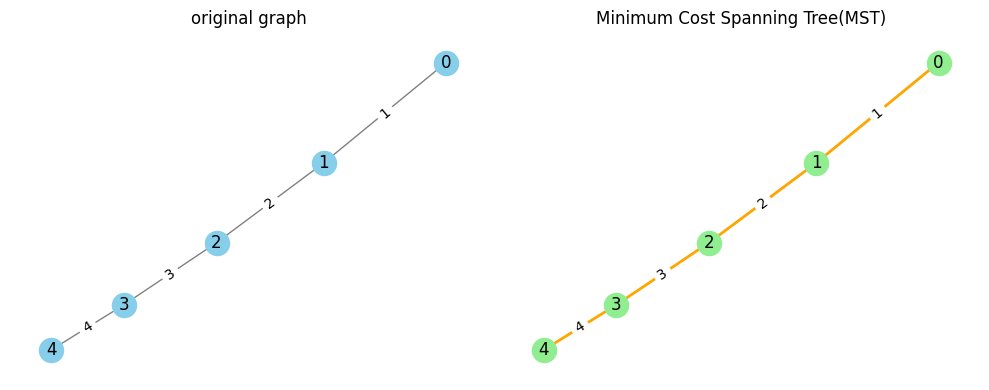

🌟 총 비용: 10


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. 그래프 정의 (가중치 포함)
G = nx.Graph()
edges = [
    (0, 1, 1),  # 0번 노드와 1번 노드 사이 가중치 1
    (1, 2, 2),  # 1-2 가중치 2
    (2, 3, 3),  # 2-3 가중치 3
    (3, 4, 4),  # 3-4 가중치 4
]
G.add_weighted_edges_from(edges)

# 2. Kruskal 알고리즘을 사용해 MST 생성
mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

# 3. MST의 총 가중치 계산
total_cost = sum(data['weight'] for u, v, data in mst.edges(data=True))

# 4. 시각화
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 4))

# 원래 그래프
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w for u, v, w in edges})
plt.title("original graph")

# MST 시각화
plt.subplot(1, 2, 2)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='orange', width=2)
nx.draw_networkx_edge_labels(mst, pos, edge_labels={(u, v): data['weight'] for u, v, data in mst.edges(data=True)})
plt.title("Minimum Cost Spanning Tree(MST)")

plt.tight_layout()
plt.show()

# 5. 출력
print(f"🌟 총 비용: {total_cost}")
